# Malaria Detection - CNN

In [6]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

## Functions

### Read Dataset:

In [7]:
def read_images(path):
    images = []
    labels = []
    num1 = 32
    num2 = 32
    for file_name in os.listdir(path):
        file_path = path + '/' + file_name
        for img_name in os.listdir(file_path):
            if not img_name.startswith('.'):
                if img_name.endswith('.png'):
                    img = cv2.imread(file_path + '/' + img_name)
                    new_img = cv2.resize(img, (num2, num1))
                    images.append(new_img)
                    if file_name == 'Parasitized':
                        label = 0
                    else:
                        label = 1
                    labels.append(label)
    
    return np.array(images), np.array(labels)

## Main Cells

### Read Data

In [8]:
full_data_x, full_data_y = read_images('cell_images')

In [9]:
full_data_x.shape, full_data_y.shape

((27558, 32, 32, 3), (27558,))

### Train and Test set:

In [11]:
train_CNN_x, test_CNN_x, train_CNN_y, test_CNN_y = train_test_split(full_data_x, full_data_y, test_size=0.2)

### Save train and test data:

In [12]:
np.save('data/train_CNN_x.npy', train_CNN_x)
np.save('data/train_CNN_y.npy', train_CNN_y)
np.save('data/test_CNN_x.npy', test_CNN_x)
np.save('data/test_CNN_y.npy', test_CNN_y)

### Load:

In [35]:
train_CNN_x = np.load('data/train_CNN_x.npy')
train_CNN_y = np.load('data/train_CNN_y.npy')
test_CNN_x = np.load('data/test_CNN_x.npy')
test_CNN_y = np.load('data/test_CNN_y.npy')

In [36]:
train_CNN_x.shape, train_CNN_y.shape, test_CNN_x.shape, test_CNN_y.shape

((22046, 32, 32, 3), (22046,), (5512, 32, 32, 3), (5512,))

### Visualize data:

Parasitized


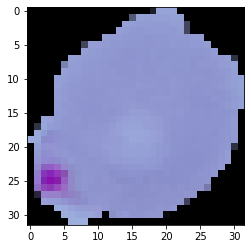

In [37]:
plt.imshow(train_CNN_x[3], cmap='gray')
if train_CNN_y[3]==1:
    print("Uninfected")
else:
    print("Parasitized")

### Convert images to gray normalized data:

In [50]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in train_CNN_x]).astype('float32')
X_train = X_train.reshape(X_train.shape[0],32,32,1) / 255.0

X_test = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in test_CNN_x]).astype('float32')
X_test = X_test.reshape(X_test.shape[0],32,32,1) / 255.0

### Categorical data Y

In [51]:
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(train_CNN_y)
y_test = lb.fit_transform(test_CNN_y)

y_train = to_categorical(train_CNN_y)
y_test = to_categorical(test_CNN_y)

In [52]:
print("X_train shape", X_train.shape)
print("Y_train shape", y_train.shape)

X_train shape (22046, 32, 32, 1)
Y_train shape (22046, 2)


## Training:

In [57]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)         

In [58]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [59]:
model.fit(X_train,y_train,batch_size=50,epochs=20,verbose=1)

Epoch 1/20
22046/22046 [==============================] - 13s 611us/sample - loss: 0.5362 - acc: 0.7034
Epoch 2/20
22046/22046 [==============================] - 12s 547us/sample - loss: 0.2352 - acc: 0.9112
Epoch 3/20
22046/22046 [==============================] - 12s 538us/sample - loss: 0.1962 - acc: 0.9293
Epoch 4/20
22046/22046 [==============================] - 12s 549us/sample - loss: 0.1710 - acc: 0.9397
Epoch 5/20
22046/22046 [==============================] - 12s 552us/sample - loss: 0.1585 - acc: 0.9441
Epoch 6/20
22046/22046 [==============================] - 13s 604us/sample - loss: 0.1540 - acc: 0.9445
Epoch 7/20
22046/22046 [==============================] - 13s 601us/sample - loss: 0.1455 - acc: 0.9487
Epoch 8/20
22046/22046 [==============================] - 13s 578us/sample - loss: 0.1383 - acc: 0.9505
Epoch 9/20
22046/22046 [==============================] - 13s 578us/sample - loss: 0.1347 - acc: 0.9516
Epoch 10/20
22046/22046 [==============================] - 12s 5

## Testing

In [60]:
predictions = model.evaluate(X_test,y_test)

5512/5512 [==============================] - 1s 186us/sample - loss: 0.1643 - acc: 0.9461
